# Cheminformatics
## 11/1/2022

<a href="?print-pdf">print view</a>

In [1]:
%%html
<script src="http://bits.csb.pitt.edu/asker.js/lib/asker.js"></script>
<style>
.reveal .highlight pre { font-size: 100%}
.reveal .slides>section>section.present { max-height: 100%; overflow-y: auto;}
</style>

<script>
$3Dmolpromise = new Promise((resolve, reject) => { 
    require(['https://3dmol.org/build/3Dmol-nojquery.js'], function(){       
            resolve();});
});

require(['https://cdnjs.cloudflare.com/ajax/libs/Chart.js/2.2.2/Chart.js'], function(Ch){
 Chart = Ch;
});

$('head').append('<link rel="stylesheet" href="http://bits.csb.pitt.edu/asker.js/themes/asker.default.css" />');


//the callback is provided a canvas object and data 
var chartmaker = function(canvas, labels, data) {
  var ctx = $(canvas).get(0).getContext("2d");
     var dataset = {labels: labels,                     
    datasets:[{
     data: data,
     backgroundColor: "rgba(150,64,150,0.5)",
         fillColor: "rgba(150,64,150,0.8)",    
  }]};
  var myBarChart = new Chart(ctx,{type:'bar',data:dataset,options:{legend: {display:false},
        scales: {
            yAxes: [{
                ticks: {
                    min: 0,
                }
            }]}}});
};

$(".jp-InputArea .o:contains(html)").closest('.jp-InputArea').hide();


</script>


*Cheminformatics (also known as chemoinformatics, chemioinformatics and chemical informatics) is the use of computer and informational techniques applied to a range of problems in the field of chemistry.* 
--Wikipedia

# Open Source Cheminformatics

* rdkit [http://www.rdkit.org](http://www.rdkit.org)
    * BSD License
    * Relatively new, very nicely architected C++ backend
    * Actively developed
    * Native Python interface

* OpenBabel [http://openbabel.org](http://openbabel.org)
    * GNU License
    * Older (forked from OpenEye in 2001), a bit crufty and complicated
    * Lots of functionality (e.g., support for more than 100 file formats)
    * Python interface is through SWIG (auto-generated) bindings to C/C++
    * Includes standalone programs: babel, obabel, etc.
    
* Pybel
    * A native, user-friendly python interface to OpenBabel
    * Limited functionality (but can always fallback to OpenBabel)
    * Simplest to use
    * **Note:** Pybel is installed as part of openbabel.  There is a completely unrelated python package called PyBEL that is *not* what you want

# File Formats

<h3>2D</h3>

<img src='imgs/CCCC.png' style='float:right'> SMILES

<h3>3D</h3>
<img src='imgs/c3d.png' style='float:right'> pdb, sdf, mol2
<br>


# Simplified Molecular Input Line Entry System (SMILES)

<h3>Atoms</h3>

Specified by their atomic symbols inside brackets

* [Au], [Fe], [Zn], etc

No brackets needed for organic subset: B, C, N, O, P, S, F, Cl, Br, and I

Aromatic atoms are lower case: c1ccccc1

<h3>Bonds</h3>

* Single <b>-</b>
* Double <b>=</b>
* Triple <b>#</b>
* Aromatic <b>:</b>

Single and aromatic can be omitted. E.g ethane (C2H6) is CC.


In [2]:
%%html
<div id="chem1" style="width: 500px"></div>
<script>
$('head').append('<link rel="stylesheet" href="http://bits.csb.pitt.edu/asker.js/themes/asker.default.css" />');

    var divid = '#chem1';
	jQuery(divid).asker({
	    id: divid,
	    question: "What is a SMILES string for ethane?",
		answers: ['cc','CC','C=C','C#C','[Ca]-[Ca]'],
        server: "http://bits.csb.pitt.edu/asker.js/example/asker.cgi",
		charter: chartmaker})
    
$(".jp-InputArea .o:contains(html)").closest('.jp-InputArea').hide();


</script>

# SMILES, cont.

<img align="right" width="500" src='imgs/b.png'>

## Branches

Parentheses denote branches and can be nested.

Example: <b>SC(N)CO</b>

## Cycles

Break a bond in the cycle and use a digit to label the break.

<img width="1000px" src='http://www.daylight.com/dayhtml/doc/theory/theory4.gif'>

As long as rings are separate, digits can be reused. Reminder, aromatics use lower-case e.g. c1ccccc1 is benzene

# SMILES, cont.

## Disconnections

A period `.` separates nonbonded molecules.

<b>[Na+].[Cl-]</b>

## Isomeric Smiles
Slashes (`/ \`) denote configuration around double bonds.

<img width="250px" src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Trans-1%2C2-difluoroethylene.svg/165px-Trans-1%2C2-difluoroethylene.svg.png">


At (`@`) denotes configuration around chiral centers.

<img width="300px" src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/90/L-Alanin_-_L-Alanine.svg/165px-L-Alanin_-_L-Alanine.svg.png">

In [3]:
%%html
<div id="chem3" style="width: 500px"></div>
<script>
$('head').append('<link rel="stylesheet" href="http://bits.csb.pitt.edu/asker.js/themes/asker.default.css" />');

    var divid = '#chem3';
	jQuery(divid).asker({
	    id: divid,
	    question: "What is a SMILES expression for benzene?",
		answers: ['c1cccc1','cccccc1','c2ccccc2','1cccccc1','c1ccccc1c'],
        server: "http://bits.csb.pitt.edu/asker.js/example/asker.cgi",
		charter: chartmaker})
    
$(".jp-InputArea .o:contains(html)").closest('.jp-InputArea').hide();


</script>

# Drawing

All but the simplest smiles can be challenging to interpret (especially if chirality is included).  Fortunately, you can use pybel (or molecular viewers like [MarvinView](https://www.chemaxon.com/products/marvin/marvinview/)) to convert them to their 2D representation.

Example: <b>CC(NC1=CC=C(O)C=C1)=O</b>

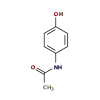

In [4]:
from openbabel import pybel
mol = pybel.readstring('smi','CC(NC1=CC=C(O)C=C1)=O')
mol

In [5]:
mol.draw(filename="imgs/accet.png",show=False) 

<img src='imgs/accet.png'>

# SMARTS

Regular expressions for molecules.

All SMILES are SMARTS (exact matches).  Additionally, SMARTS support

* wild cards 
    * `C~*~C` any atom can be between two carbons using any (~) bond
    * `a1aaaaa1` any aromatic 6 atom ring
* property testing 
    * `[R]` atom in a ring
    * `[#6]` atomic number is 6 (matches aromatic or aliphatic)
    * `[D3]` atom with three explicit bonds (degree)
* logical operators (not - <b>!</b>, and - <b>&</b>  <b>;</b>, or - <b>,</b>)
    * `[!C&R]` not aliphatic carbon and in ring
    * `[F,Cl,Br,I]` one of the first four halogens
* matching an atomic environment ('recursive' SMARTS)
    * `[$(*O);$(*C)]` this matches one atom that is bound to both C and O

In [6]:
%%html
<div id="chem4" style="width: 500px"></div>
<script>
$('head').append('<link rel="stylesheet" href="http://bits.csb.pitt.edu/asker.js/themes/asker.default.css" />');

    var divid = '#chem4';
	jQuery(divid).asker({
	    id: divid,
	    question: "What is the best SMARTS expression for matching a 6 carbon ring?",
		answers: ['[#6]1~[#6]~[#6]~[#6]~[#6]~[#6]1','c1ccccc1','[R][R][R][R][R][R]','[R]1[R][R][R][R][R]1','CCCCCC'],
        server: "http://bits.csb.pitt.edu/asker.js/example/asker.cgi",
		charter: chartmaker})
    
$(".jp-InputArea .o:contains(html)").closest('.jp-InputArea').hide();


</script>

# Pybel Input/Output

`pybel.readstring`

Takes a format and string with molecular data in it and returns a single molecule.

In [7]:
mol = pybel.readstring('smi','CCCC')
len(mol.atoms)

4

For simple output, use the molecule's `write` method, which takes the format

In [8]:
mol.write('sdf','output.sdf',overwrite=True) #write to file
print(mol.write('sdf')) #no filename - return string


 OpenBabel10312213312D

  4  3  0  0  0  0  0  0  0  0999 V2000
    0.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0  0  0  0
  2  3  1  0  0  0  0
  3  4  1  0  0  0  0
M  END
$$$$



# `pybel.readfile`

`pybel.readfile`

Takes a format and file name and returns an *iterator* over all the molecules in the file.

In [9]:
mols = list(pybel.readfile('smi','../files/results.smi')) #expand the iterator into a list
len(mols)

14

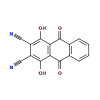

In [10]:
mol = next(pybel.readfile('smi','../files/results.smi')) #get just first molecule
mol

In [11]:
#of course, this is the most efficient way to read all
for mol in pybel.readfile('smi','../files/results.smi'): 
    print(mol.write('can').rstrip()) #canonical smiles

N#Cc1c(O)c2C(=O)c3ccccc3C(=O)c2c(c1C#N)O	NSC27034
N#Cc1cc2SCCSCCCSCCSc2cc1C#N	NSC680721
N#Cc1cc2CN(CCN(CCN(CCN(Cc2cc1C#N)S(=O)(=O)c1ccc(cc1)C)S(=O)(=O)c1ccc(cc1)C)S(=O)(=O)c1ccc(cc1)C)S(=O)(=O)c1ccc(cc1)C	NSC673657
N#Cc1cc2/C(=N\c3cccc(n3)N)/N=C(c2cc1C#N)Nc1cccc(n1)N	NSC666078
N#Cc1c(OC)ccc(c1C#N)O.COc1ccc(c(c1C#N)C#N)OC	NSC618324
N#Cc1c(C#N)c(O)c2c(c1O)c(N)ccc2	NSC320651
N#Cc1cc(ccc1C#N)NC(=O)CCCC(=O)Nc1ccc(c(c1)C#N)C#N	NSC309816
N#Cc1c(C#N)c(O)c(c(c1O)Cl)Cl	NSC172566
N#Cc1c(C#N)c(O)c2c(c1O)cccc2	NSC128281
N#Cc1cc(ccc1C#N)[N+](=O)[O-]	NSC123374
N#Cc1cc(ccc1C#N)Oc1ccc(c(c1)C#N)C#N	NSC94808
N#Cc1c2c(cc(c1C#N)[N+](=O)[O-])n(c1c2cccc1)C	NSC92934
N#Cc1c(O)ccc(c1C#N)O	NSC43554
N#Cc1ccccc1C#N	NSC17562


# `pybel.Outputfile`

To output many molecules to the same file, use `pybel.Outputfile`

In [12]:
output = pybel.Outputfile('sdf','output.sdf',overwrite=True)
for m in mols:
    output.write(m)

# Molecules

The molecule object provides a number of methods and access to the molecules atoms and bonds.

In [13]:
for atom in mol:
    print(atom.atomicnum,end=' ')

6 6 6 6 6 6 6 7 6 7 

Atom properties include `atomicmass`, `atomicnum`, `coords`, `formalcharge`, `hyb`, `isotope`, `partialcharge` and `degree`

Atoms can also be accessed in `mol.atoms`

In [14]:
%%html
<div id="chemval" style="width: 500px"></div>
<script>
$('head').append('<link rel="stylesheet" href="http://bits.csb.pitt.edu/asker.js/themes/asker.default.css" />');

    var divid = '#chemval';
	jQuery(divid).asker({
	    id: divid,
	    question: "What is the valence of the first atom of CC?",
		answers: ['0','1','2','3','4'],
        server: "http://bits.csb.pitt.edu/asker.js/example/asker.cgi",
		charter: chartmaker})
    
$(".jp-InputArea .o:contains(html)").closest('.jp-InputArea').hide();


</script>

In [15]:
m = pybel.readstring('smi','CC')
a1 = m.atoms[0]
print(a1.degree, a1.heavydegree)

1 1


# SMARTS Matching

SMARTS matching is done by initializing a `pybel.Smarts` object with a SMARTS expression.  This can then be applied to any molecule to identify the matching atoms.

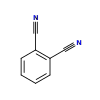

In [16]:
mol

In [17]:
aromatic_ring = pybel.Smarts('a1aaaaa1')
aromatic_ring.findall(mol) #returns all _unique_ matches

[(1, 6, 5, 4, 3, 2)]

The returned matches are atom indices that can be accessed through `mol.atoms`

In [18]:
double_ring = pybel.Smarts('a1aaaa2a1aaaa2')
for (i,m) in enumerate(mols):
    if double_ring.findall(m):
        print(i)
        m.draw(filename="r%d.png"%i,show=False) 


5
8


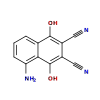

In [19]:
mols[5]

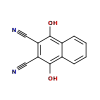

In [20]:
mols[8]

# Molecular Properties

In [21]:
print(mol.molwt) #molecular weight

128.13076


In [22]:
desc = mol.calcdesc()
print(desc)

{'abonds': 6.0, 'atoms': 10.0, 'bonds': 10.0, 'cansmi': nan, 'cansmiNS': nan, 'dbonds': 0.0, 'formula': nan, 'HBA1': 2.0, 'HBA2': 2.0, 'HBD': 0.0, 'InChI': nan, 'InChIKey': nan, 'L5': nan, 'logP': 1.42996, 'MR': 35.872, 'MW': 128.13076, 'nF': 0.0, 'rotors': 0.0, 's': nan, 'sbonds': 2.0, 'smarts': nan, 'tbonds': 2.0, 'title': nan, 'TPSA': 47.58}


In [23]:
desc['logP'] #calculated partition coefficient between octanol/water

1.42996

# Lipinski's Rule of Five

In 1997 Christopher Lipinski analyzed existing drugs and came up with a set of molecular property rules for classifying a small molecule as *drug-like*.

* No more than 5 hydrogen bond donors
* No more than 10 hydrogen bond acceptors
* Molecular weight less than 500 daltons
* Partition coefficient logP less than 5
* There is no fifth rule

In [24]:
def lipinski(mol):
    desc = mol.calcdesc()
    return desc['HBD'] <= 5 and desc['HBA1'] <= 10 and desc['MW'] <= 500 and desc['logP'] <= 5

In [25]:
for m in mols:
    print(lipinski(m))

True
True
False
True
True
True
True
True
True
True
True
True
True
True


# Fingerprints

A *molecular fingerprint* reduces the chemical features of a molecule into a *bit vector*.  The features of the fingerprint correspond to a bit in the vector.  This bit is set if the compound has that feature.

The most common type of fingerprint is a Daylight style fingerprint where all the paths (up to a given length) are enumerated and *hashed* to their bit positions.

<img src='https://chemaxon.com/hs-fs/hubfs/cfp_generation.png?width=627&height=351&name=cfp_generation.png'>



# Fingerprints, cont.

Bit vectors can easily be compared, most commonly with the Tanimoto coefficient:
$$\frac{A \cap B}{A \cup B}$$

This provides a quantitative measure of *chemical similarity*.

Similarity search is a surprisingly effective mechanism of virtual screening (given enough data).

In [26]:
fp = mol.calcfp()
type(fp)

openbabel.pybel.Fingerprint

In [27]:
print(fp.bits)

[75, 82, 224, 279, 296, 299, 348, 440, 442, 474, 503, 598, 656, 671, 711, 716, 728, 870, 906, 913, 937]


# Chemical Similarity

### Tanimoto coefficient
$\Large \frac{A \cap B}{A \cup B}$  1.0 means identical


e.g. Tanimoto coefficient of the bitstrings 1001 and 0011 is 0.33

To calculate the Tanimoto similarity between two fingerprints, use the **|** operator

In [28]:
fp = mol.calcfp()
for m in mols:
    f = m.calcfp()
    print(f | fp)

0.28
0.3
0.19626168224299065
0.12138728323699421
0.5
0.4666666666666667
0.29577464788732394
0.42857142857142855
0.6176470588235294
0.4117647058823529
0.4772727272727273
0.22826086956521738
0.6363636363636364
1.0


In [29]:
%%html
<div id="chemsim" style="width: 500px"></div>
<script>
$('head').append('<link rel="stylesheet" href="http://bits.csb.pitt.edu/asker.js/themes/asker.default.css" />');

    var divid = '#chemsim';
	jQuery(divid).asker({
	    id: divid,
	    question: "What is the Tanimoto coefficient of the bitstrings 1001 and 0011?",
		answers: ['0','0.25','0.33','0.5','0.66','0.75','1.0'],
        server: "http://bits.csb.pitt.edu/asker.js/example/asker.cgi",
		charter: chartmaker})
    
$(".jp-InputArea .o:contains(html)").closest('.jp-InputArea').hide();


</script>

# 2D -> 3D

In [30]:
mol.make3D() #this makes a reasonable 3D structure
print(mol.atoms[0].coords)
mol.localopt() #this further optimizes the structure
print(mol.atoms[0].coords)

(0.7656749137001738, -0.08415478296300143, -0.15465954760011352)
(1.2410627944678445, 0.05282849408781525, 0.10746537534097979)


In [31]:
sdf = mol.write('sdf')

In [32]:
import py3Dmol
view = py3Dmol.view()
view.addModel(sdf)
view.setStyle({'stick':{}})
view.zoomTo()
view.show()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

# `sdf` Molecules

In [33]:
mols = list(pybel.readfile('sdf','../files/best.sdf'))
len(mols)

10

In [34]:
atom = mols[0].atoms[0]
print(atom.coords)

(-0.5939, -56.8911, 14.3139)


In [35]:
!cat ../files/best.sdf

ZINC78996542


 39 44  0  0  0  0  0  0  0  0999 V2000
   -0.5939  -56.8911   14.3139 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.3154  -57.8883   15.8741 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.3628  -55.5394   14.9296 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.0440  -55.7357   15.4805 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.3058  -57.7869   14.5684 N   0  0  0  0  0  0  0  0  0  0  0  0
    1.2724  -57.1748   15.3144 N   0  0  0  0  0  0  0  0  0  0  0  0
    3.1864  -57.3893   16.5881 O   0  0  0  0  0  0  0  0  0  0  0  0
   -6.5650  -58.0576   12.9536 C   0  0  0  0  0  0  0  0  0  0  0  0
   -6.4112  -58.0403   11.5707 C   0  0  0  0  0  0  0  0  0  0  0  0
   -5.4635  -57.8375   13.7859 C   0  0  0  0  0  0  0  0  0  0  0  0
   -5.1560  -57.8031   11.0185 C   0  0  0  0  0  0  0  0  0  0  0  0
   -4.1883  -57.5962   13.2480 C   0  0  0  0  0  0  0  0  0  0  0  0
   -4.0573  -57.5833   11.8565 C   0  0  0  0  0  0  0  0  0  0  0  0
   -2.9942  -57.3574   14.1090 C   

`sdf` files can have arbitrary data embedded in them:

    M  END
    > <minimizedAffinity>
    -7.83433

    > <minimizedRMSD>
    1.45522

    > <molecular weight>
    475.372

    $$$$

In [36]:
mols[0].data


 30 35  2  0  0  0
 31 36  2  0  0  0
 12 13  2  0  0  0
 33 35  2  0  0  0
 34 36  2  0  0  0
 14 15  2  0  0  0
  1  5  2  0  0  0
 16 18  2  0  0  0
  2  7  2  0  0  0
 17 19  1  0  0  0
M  END
> <minimizedAffinity>
-7.60183

> <minimizedRMSD>
2.26383

> <molecular weight>
475.372

$$$$
ZINC78996542


 39 44  0  0  0  0  0  0  0  0999 V2000
   -1.1562  -57.7105   14.6555 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.0859  -57.6546   15.8298 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.1390  -56.2126   14.7797 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.3392  -55.9873   15.0720 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.0584  -58.3149   14.9816 N   0  0  0  0  0  0  0  0  0  0  0  0
    0.8469  -57.3439   15.3020 N   0  0  0  0  0  0  0  0  0  0  0  0
    2.9188  -56.8145   16.1731 O   0  0  0  0  0  0  0  0  0  0  0  0
   -6.8917  -60.1405   14.9063 C   0  0  0  0  0  0  0  0  0  0  0  0
   -6.9219  -60.5932   13.5908 C   0  0  0  0  0  0  0  0  0  0  0  0
   -5.7606  -59.4813   

{'MOL Chiral Flag': '0', 'minimizedAffinity': '-7.83433', 'minimizedRMSD': '1.45522', 'molecular weight': '475.372', 'OpenBabel Symmetry Classes': '27 24 14 23 12 26 2 6 7 16 15 31 35 32 29 34 30 4 5 13 13 11 11 28 21 1 10 17 20 9 8 25 36 33 18 19 3 3 22'}


   -2.9885  -56.5777   20.4491 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.6434  -55.4303   12.6355 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.3219  -54.7691   11.6131 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.1612  -54.4616   14.2263 C   0  0  0  0  0  0  0  0  0  0  0  0
    4.1096  -52.5500   11.1925 C   0  0  0  0  0  0  0  0  0  0  0  0
    4.5256  -52.3975   12.4883 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.0650  -55.2760   13.9477 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.4186  -53.9532   11.8808 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.8462  -53.7965   13.2121 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.0567  -53.3258   10.8773 N   0  0  0  0  0  0  0  0  0  0  0  0
    3.9009  -53.0163   13.5062 N   0  0  0  0  0  0  0  0  0  0  0  0
    2.4158  -59.7838   14.5992 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.6872  -59.3395   16.7216 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.3789  -59.1280   15.9719 C   0  0  0  0  0  0  0  0  0  0  0  0
  8  9  1  0  0  0


# Beyond Pybel

Recall that Pybel is a python-native wrapper around the OpenBabel SWIG bindings.  The underlying OpenBabel objects are always accessible if you need to use the additional functionality provided by OpenBabel (this may be necessary if you modifying or creating molecule objects).

In [37]:
obmol = mol.OBMol
vec = obmol.Center(0)
print(vec)


   -2.2330  -58.7336   14.3037 C   0  0  0  0  0  0  0  0  0  0  0  0
   -2.2693  -59.3140   12.9166 C   0  0  0  0  0  0  0  0  0  0  0  0
   -3.4559  -59.8659   12.4992 N   0  0  0  0  0  0  0  0  0  0  0  0
   -1.2700  -59.2867   12.1988 O   0  0  0  0  0  0  0  0  0  0  0  0
   -3.4977  -60.2499   11.5936 H   0  0  0  0  0  0  0  0  0  0  0  0
   -0.9776  -58.1384   14.7708 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.1137  -55.4723   15.4114 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0691  -59.0065   15.4111 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.2024  -57.9977   15.5499 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.4883  -55.4632   16.0337 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.6963  -56.8762   14.7006 N   0  0  0  0  0  0  0  0  0  0  0  0
    0.5616  -56.7229   15.2098 N   0  0  0  0  0  0  0  0  0  0  0  0
    0.5532  -54.4160   15.1161 O   0  0  0  0  0  0  0  0  0  0  0  0
    3.3452  -58.4103   12.4429 C   0  0  0  0  0  0  0  0  0  0  0  0
    4.5464  -58.870

In [38]:
print(vec.GetX(),vec.GetY(),vec.GetZ())


 18 15  1  0  0  0
 28 33  1  0  0  0
 28  8  1  0  0  0
  7  6  1  0  0  0
 29 31  2  0  0  0
 30 32  2  0  0  0
 21 23  2  0  0  0
 22 25  2  0  0  0
 24 26  2  0  0  0
 11 14  2  0  0  0
 12 15  2  0  0  0
 13 16  2  0  0  0
  1  3  2  0  0  0
 33 34  2  0  0  0
  2  6  2  0  0  0
  4  9  2  0  0  0
  7 10  1  0  0  0
 19 20  1  0  0  0
M  END
> <minimizedAffinity>
-7.49359

> <minimizedRMSD>
2.12367

> <molecular weight>
442.764

$$$$
ZINC39912344


 35 39  0  0  0  0  0  0  0  0999 V2000
   -2.9655  -58.0579   14.4075 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.7487  -57.5053   14.0153 C   0  0  0  0  0  0  0  0  0  0  0  0
   -3.8718  -57.6016   13.4941 C   0  0  0  0  0  0  0  0  0  0  0  0
   -5.1866  -58.0933   13.7357 C   0  0  0  0  0  0  0  0  0  0  0  0
   -3.6126  -58.9419   15.4006 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.8851  -56.7323   12.9225 N   0  0  0  0  0  0  0  0  0  0  0  0
   -3.2070  -56.8131   12.6256 N   0  0  0  0  0  0  0  0  0  0  0  0
   -5.0176 

In [39]:
dir(obmol)


 28 34  1  0  0  0
 28  8  1  0  0  0
  7  6  1  0  0  0
 21 23  2  0  0  0
 22 25  2  0  0  0
 29 31  2  0  0  0
 30 33  2  0  0  0
 32 34  2  0  0  0
 24 26  2  0  0  0
 11 14  2  0  0  0
 12 15  2  0  0  0
 13 16  2  0  0  0
  1  3  2  0  0  0
  2  6  2  0  0  0
  4  9  2  0  0  0
  7 10  1  0  0  0
 19 20  1  0  0  0
M  END
> <minimizedAffinity>
-7.4906

> <minimizedRMSD>
1.79745

> <molecular weight>
419.322

$$$$


['AddAtom',
 'AddBond',
 'AddConformer',
 'AddHydrogens',
 'AddNewHydrogens',
 'AddNonPolarHydrogens',
 'AddPolarHydrogens',
 'AddResidue',
 'Align',
 'AreInSameRing',
 'AssignSpinMultiplicity',
 'AssignTotalChargeToAtoms',
 'AutomaticFormalCharge',
 'AutomaticPartialCharge',
 'BeginAtom',
 'BeginAtoms',
 'BeginBond',
 'BeginBonds',
 'BeginConformer',
 'BeginData',
 'BeginInternalCoord',
 'BeginModify',
 'BeginResidue',
 'BeginResidues',
 'Center',
 'ClassDescription',
 'Clear',
 'CloneData',
 'ConnectTheDots',
 'ContigFragList',
 'ConvertDativeBonds',
 'ConvertZeroBonds',
 'CopyConformer',
 'CopySubstructure',
 'CorrectForPH',
 'DataSize',
 'DecrementMod',
 'DeleteAtom',
 'DeleteBond',
 'DeleteConformer',
 'DeleteData',
 'DeleteHydrogen',
 'DeleteHydrogens',
 'DeleteNonPolarHydrogens',
 'DeletePolarHydrogens',
 'DeleteResidue',
 'DestroyAtom',
 'DestroyBond',
 'DestroyResidue',
 'DoTransformations',
 'Empty',
 'EndAtom',
 'EndAtoms',
 'EndBond',
 'EndBonds',
 'EndData',
 'EndModify',


# Project: Dimensionality Reduced Molecules

Given a SMILES file where the molecules names are property (e.g. binding affinity), map the molecules into 2D space using PCA and visualize the data colored by the property.

 * Read SMILES
 * Save title as property to label with
 * Compute fingerprint
 * Convert fingerprint bits into an array of size 1024 of zeroes and ones
 * Use `sklearn.decomposition.PCA` to transform the fingerprints into 2D coordinates
 * Plot the coordinates and color by specified property

In [40]:
!wget https://asinansaglam.github.io/python_bio_2022/files/er.smi

'wget' is not recognized as an internal or external command,
operable program or batch file.


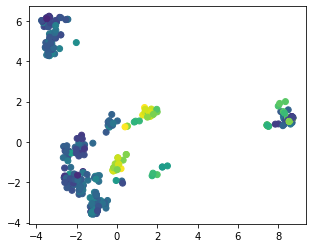

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

yvals = []
fps = []
for mol in pybel.readfile('smi','er.smi'):
    yvals.append(float(mol.title))
    fpbits = mol.calcfp().bits
    fp = np.zeros(1024)
    fp[fpbits] = 1
    fps.append(fp)
    
pca = PCA(n_components=2)
res = pca.fit_transform(fps)    

plt.scatter(res[:,0],res[:,1],c=yvals)
plt.gca().set_aspect('equal', adjustable='box');

[[1.         0.97673449]
 [0.97673449 1.        ]]


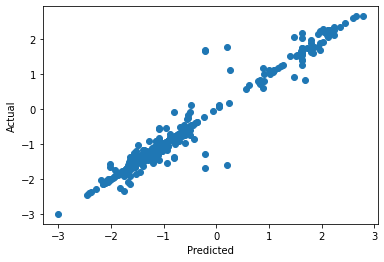

In [44]:
import numpy as np
from openbabel import pybel
from sklearn.linear_model import  LinearRegression
from sklearn.linear_model import  LassoCV
import matplotlib.pyplot as plt
%matplotlib inline

yvals = []
fps = []
for mol in pybel.readfile('smi','er.smi'):
    yvals.append(float(mol.title))
    fpbits = mol.calcfp().bits
    fp = np.zeros(1024)
    fp[fpbits] = 1
    fps.append(fp)
    
fps = np.array(fps)
yvals = np.array(yvals)
lin = LinearRegression()
lin.fit(fps,yvals)
pred = lin.predict(fps)
print(np.corrcoef(pred,yvals))
plt.plot(pred,yvals,'o')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

